# 06. Train Random Forest Model

This notebook trains a Random Forest classifier for deforestation detection.

**Approach:**
- Traditional machine learning (no deep learning)
- Flattened features: 128×128×14 = 229,376 features per sample
- Ensemble of decision trees (100 trees)
- Feature importance analysis

**Outputs:**
- Trained model: `checkpoints/random_forest_best.pkl`
- Training metrics
- Feature importance analysis
- Comparison with CNN models

## 1. Setup

In [1]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Add project root to path
project_root = Path.cwd().parent
src_path = project_root / 'src'

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

print(f"Project root: {project_root}")
print(f"Source dir: {src_path}")

Project root: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH
Source dir: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\src


In [2]:
from ml_models import RandomForestModel, load_patches_for_ml
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Set style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Data

In [3]:
# Paths
patches_dir = project_root / 'data' / 'patches'
checkpoints_dir = project_root / 'checkpoints'
logs_dir = project_root / 'logs'
figures_dir = project_root / 'figures'

checkpoints_dir.mkdir(exist_ok=True)
logs_dir.mkdir(exist_ok=True)
figures_dir.mkdir(exist_ok=True)

print("Directories created/verified!")

Directories created/verified!


In [4]:
print("="*80)
print("LOADING PATCHES")
print("="*80)
print()

# Load train set
X_train, y_train = load_patches_for_ml(patches_dir, 'train')
print()

# Load validation set
X_val, y_val = load_patches_for_ml(patches_dir, 'val')
print()

# Load test set
X_test, y_test = load_patches_for_ml(patches_dir, 'test')
print()

print("="*80)
print("DATASET SUMMARY")
print("="*80)
print(f"Train: {len(X_train)} samples")
print(f"Val: {len(X_val)} samples")
print(f"Test: {len(X_test)} samples")
print(f"Total: {len(X_train) + len(X_val) + len(X_test)} samples")
print()
print(f"Features per sample: {X_train.shape[1]:,} (128×128×14)")
print(f"Memory: Train={X_train.nbytes/1e6:.1f}MB, Val={X_val.nbytes/1e6:.1f}MB, Test={X_test.nbytes/1e6:.1f}MB")

LOADING PATCHES



Loading train:   0%|          | 0/899 [00:00<?, ?patch/s]

Loaded 899 patches from train set
  Features shape: (899, 229376)
  Labels shape: (899,)
  Class distribution: [454 445]



Loading val:   0%|          | 0/193 [00:00<?, ?patch/s]

Loaded 193 patches from val set
  Features shape: (193, 229376)
  Labels shape: (193,)
  Class distribution: [98 95]



Loading test:   0%|          | 0/193 [00:00<?, ?patch/s]

Loaded 193 patches from test set
  Features shape: (193, 229376)
  Labels shape: (193,)
  Class distribution: [98 95]

DATASET SUMMARY
Train: 899 samples
Val: 193 samples
Test: 193 samples
Total: 1285 samples

Features per sample: 229,376 (128×128×14)
Memory: Train=824.8MB, Val=177.1MB, Test=177.1MB


## 3. Model Configuration

In [5]:
# Model hyperparameters
model_config = {
    'n_estimators': 100,        # Number of trees
    'max_depth': 20,            # Maximum depth of trees
    'min_samples_split': 10,    # Min samples to split a node
    'min_samples_leaf': 4,      # Min samples at leaf node
    'random_state': 42,         # For reproducibility
    'n_jobs': -1                # Use all CPU cores
}

print("Model Configuration:")
print("="*80)
for key, value in model_config.items():
    print(f"  {key:20s}: {value}")
print()
print("Note: n_jobs=-1 means using all available CPU cores for parallel training")

Model Configuration:
  n_estimators        : 100
  max_depth           : 20
  min_samples_split   : 10
  min_samples_leaf    : 4
  random_state        : 42
  n_jobs              : -1

Note: n_jobs=-1 means using all available CPU cores for parallel training


## 4. Train Random Forest

In [6]:
print("="*80)
print("TRAINING RANDOM FOREST")
print("="*80)
print()

# Create model
model = RandomForestModel(**model_config)

# Train model
start_time = datetime.now()
metrics = model.train(X_train, y_train, X_val, y_val)
end_time = datetime.now()

training_time = (end_time - start_time).total_seconds()

print()
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

TRAINING RANDOM FOREST

Training Random Forest with 899 samples...

Training completed in 4.82 seconds (0.08 minutes)


## 5. Training Metrics

In [7]:
print("="*80)
print("TRAINING METRICS")
print("="*80)
print()

print("Train Set:")
print("-"*80)
print(f"  Accuracy:  {metrics['train_acc']:.4f}")
print(f"  Precision: {metrics['train_precision']:.4f}")
print(f"  Recall:    {metrics['train_recall']:.4f}")
print(f"  F1 Score:  {metrics['train_f1']:.4f}")
print(f"  AUC:       {metrics['train_auc']:.4f}")
print()

print("Validation Set:")
print("-"*80)
print(f"  Accuracy:  {metrics['val_acc']:.4f}")
print(f"  Precision: {metrics['val_precision']:.4f}")
print(f"  Recall:    {metrics['val_recall']:.4f}")
print(f"  F1 Score:  {metrics['val_f1']:.4f}")
print(f"  AUC:       {metrics['val_auc']:.4f}")

TRAINING METRICS

Train Set:
--------------------------------------------------------------------------------
  Accuracy:  0.9944
  Precision: 0.9889
  Recall:    1.0000
  F1 Score:  0.9944
  AUC:       1.0000

Validation Set:
--------------------------------------------------------------------------------
  Accuracy:  0.9741
  Precision: 0.9688
  Recall:    0.9789
  F1 Score:  0.9738
  AUC:       0.9988


## 6. Test Set Evaluation

In [8]:
print("="*80)
print("TEST SET EVALUATION")
print("="*80)
print()

# Evaluate on test set
test_metrics = model.evaluate(X_test, y_test)

print("Test Set:")
print("-"*80)
print(f"  Accuracy:  {test_metrics['accuracy']:.4f}")
print(f"  Precision: {test_metrics['precision']:.4f}")
print(f"  Recall:    {test_metrics['recall']:.4f}")
print(f"  F1 Score:  {test_metrics['f1']:.4f}")
print(f"  AUC:       {test_metrics['auc']:.4f}")

TEST SET EVALUATION

Test Set:
--------------------------------------------------------------------------------
  Accuracy:  0.9948
  Precision: 1.0000
  Recall:    0.9895
  F1 Score:  0.9947
  AUC:       0.9999


In [9]:
# Detailed classification report
y_test_pred = model.predict(X_test)

print()
print("Detailed Classification Report:")
print("="*80)
print(classification_report(y_test, y_test_pred, 
                          target_names=['No Deforestation', 'Deforestation']))


Detailed Classification Report:
                  precision    recall  f1-score   support

No Deforestation       0.99      1.00      0.99        98
   Deforestation       1.00      0.99      0.99        95

        accuracy                           0.99       193
       macro avg       0.99      0.99      0.99       193
    weighted avg       0.99      0.99      0.99       193



## 7. Confusion Matrix

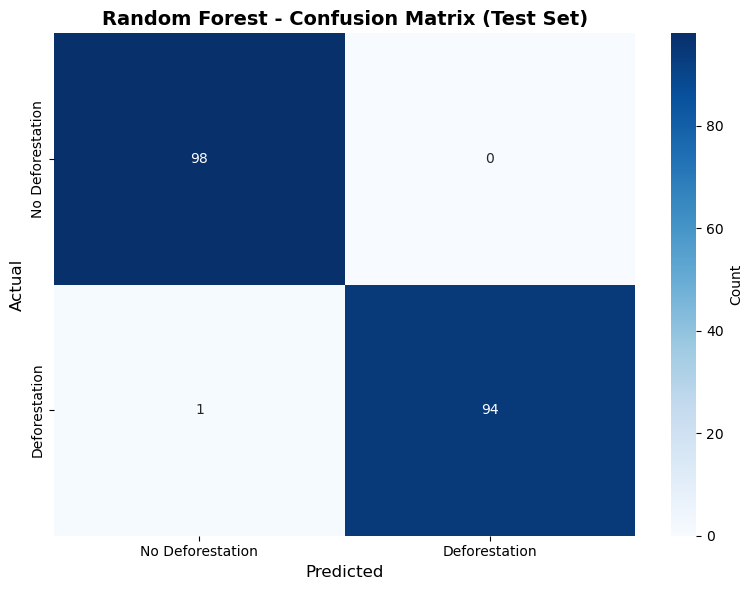

Confusion matrix saved to: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\figures\random_forest_confusion_matrix.png


In [10]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Deforestation', 'Deforestation'],
            yticklabels=['No Deforestation', 'Deforestation'],
            cbar_kws={'label': 'Count'})
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Actual', fontsize=12)
ax.set_title('Random Forest - Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(figures_dir / 'random_forest_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Confusion matrix saved to: {figures_dir / 'random_forest_confusion_matrix.png'}")

## 8. ROC Curve

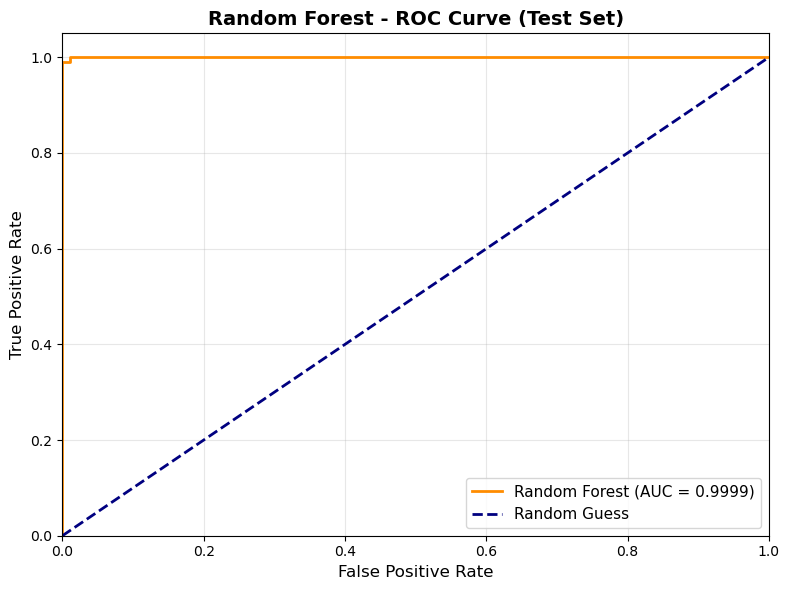

ROC curve saved to: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\figures\random_forest_roc_curve.png


In [11]:
# Get predicted probabilities
y_test_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, color='darkorange', lw=2, 
        label=f'Random Forest (AUC = {roc_auc:.4f})')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('Random Forest - ROC Curve (Test Set)', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=11)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig(figures_dir / 'random_forest_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"ROC curve saved to: {figures_dir / 'random_forest_roc_curve.png'}")

## 9. Feature Importance Analysis

In [12]:
# Get feature importance
importance = model.get_feature_importance()

print("="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)
print()
print(f"Total features: {len(importance):,}")
print(f"Feature importance range: [{importance.min():.6f}, {importance.max():.6f}]")
print(f"Mean importance: {importance.mean():.6f}")
print(f"Std importance: {importance.std():.6f}")

FEATURE IMPORTANCE ANALYSIS

Total features: 229,376
Feature importance range: [0.000000, 0.018136]
Mean importance: 0.000004
Std importance: 0.000146


In [13]:
# Reshape importance to (128, 128, 14)
importance_map = importance.reshape(128, 128, 14)

# Calculate band-wise importance (average over spatial dimensions)
band_importance = importance_map.mean(axis=(0, 1))

# Band names
band_names = [
    'Blue_2024', 'Green_2024', 'Red_2024', 'NIR_2024',
    'NDVI_2024', 'NBR_2024', 'NDMI_2024',
    'Blue_2025', 'Green_2025', 'Red_2025', 'NIR_2025',
    'NDVI_2025', 'NBR_2025', 'NDMI_2025'
]

print()
print("Average Importance by Band:")
print("-"*80)
for i, (name, imp) in enumerate(zip(band_names, band_importance)):
    bar = '█' * int(imp * 1000)
    print(f"  Band {i:2d} ({name:12s}): {imp:.6f} {bar}")


Average Importance by Band:
--------------------------------------------------------------------------------
  Band  0 (Blue_2024   ): 0.000001 
  Band  1 (Green_2024  ): 0.000001 
  Band  2 (Red_2024    ): 0.000001 
  Band  3 (NIR_2024    ): 0.000001 
  Band  4 (NDVI_2024   ): 0.000001 
  Band  5 (NBR_2024    ): 0.000001 
  Band  6 (NDMI_2024   ): 0.000001 
  Band  7 (Blue_2025   ): 0.000012 
  Band  8 (Green_2025  ): 0.000005 
  Band  9 (Red_2025    ): 0.000003 
  Band 10 (NIR_2025    ): 0.000006 
  Band 11 (NDVI_2025   ): 0.000008 
  Band 12 (NBR_2025    ): 0.000010 
  Band 13 (NDMI_2025   ): 0.000010 


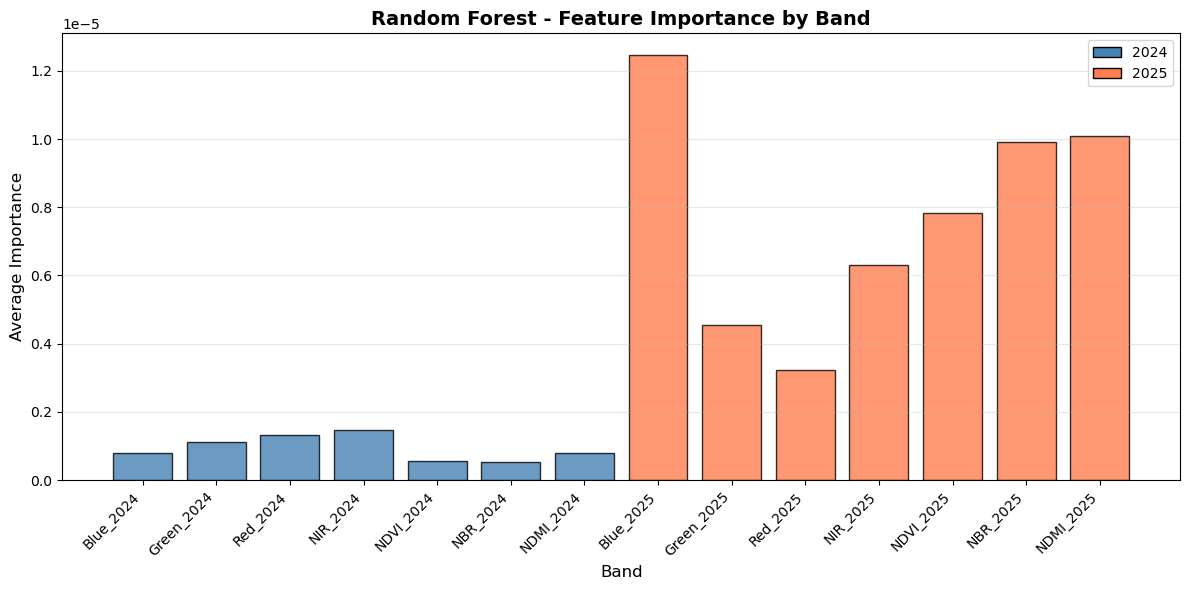

Band importance plot saved to: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\figures\random_forest_band_importance.png


In [14]:
# Plot band importance
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['steelblue']*7 + ['coral']*7  # Different colors for 2024 vs 2025
bars = ax.bar(range(14), band_importance, color=colors, edgecolor='black', alpha=0.8)

ax.set_xlabel('Band', fontsize=12)
ax.set_ylabel('Average Importance', fontsize=12)
ax.set_title('Random Forest - Feature Importance by Band', fontsize=14, fontweight='bold')
ax.set_xticks(range(14))
ax.set_xticklabels(band_names, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='steelblue', edgecolor='black', label='2024'),
    Patch(facecolor='coral', edgecolor='black', label='2025')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.savefig(figures_dir / 'random_forest_band_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Band importance plot saved to: {figures_dir / 'random_forest_band_importance.png'}")

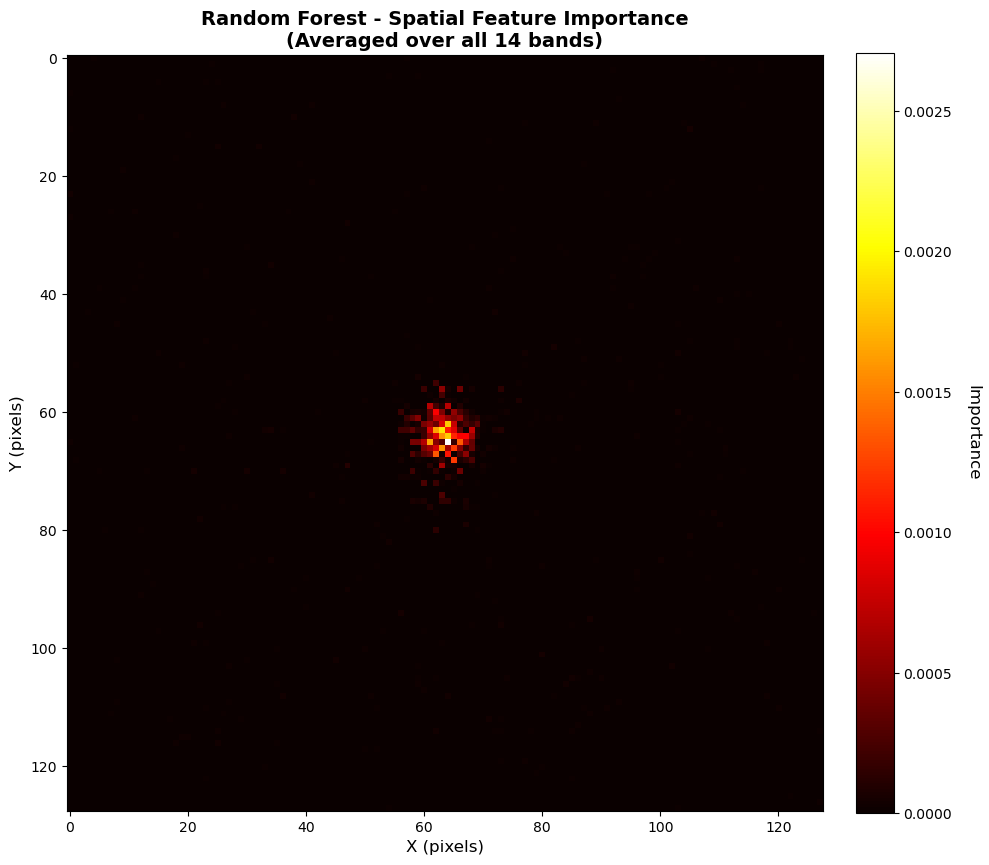

Spatial importance heatmap saved to: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\figures\random_forest_spatial_importance.png

Note: Brighter areas indicate more important spatial locations for classification


In [15]:
# Calculate spatial importance (average over bands)
spatial_importance = importance_map.mean(axis=2)

# Plot spatial importance heatmap
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(spatial_importance, cmap='hot', interpolation='nearest')
ax.set_title('Random Forest - Spatial Feature Importance\n(Averaged over all 14 bands)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('X (pixels)', fontsize=12)
ax.set_ylabel('Y (pixels)', fontsize=12)
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Importance', fontsize=12, rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig(figures_dir / 'random_forest_spatial_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Spatial importance heatmap saved to: {figures_dir / 'random_forest_spatial_importance.png'}")
print()
print("Note: Brighter areas indicate more important spatial locations for classification")

## 10. Save Model

In [16]:
# Save trained model
model_path = checkpoints_dir / 'random_forest_best.pkl'
model.save(model_path)

print()
print(f"Model saved to: {model_path}")
print(f"Model size: {model_path.stat().st_size / 1e6:.2f} MB")

Model saved to: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\checkpoints\random_forest_best.pkl

Model saved to: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\checkpoints\random_forest_best.pkl
Model size: 0.31 MB


## 11. Save Training Log

In [17]:
# Save training log
log_path = logs_dir / 'random_forest_training.txt'

with open(log_path, 'w', encoding='utf-8') as f:
    f.write("="*80 + "\n")
    f.write("RANDOM FOREST TRAINING LOG\n")
    f.write("="*80 + "\n\n")
    
    f.write(f"Training date: {start_time.strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Training time: {training_time:.2f} seconds ({training_time/60:.2f} minutes)\n\n")
    
    f.write("MODEL CONFIGURATION:\n")
    f.write("-"*80 + "\n")
    for key, value in model_config.items():
        f.write(f"  {key}: {value}\n")
    f.write("\n")
    
    f.write("DATASET:\n")
    f.write("-"*80 + "\n")
    f.write(f"  Train: {len(X_train)} samples\n")
    f.write(f"  Val: {len(X_val)} samples\n")
    f.write(f"  Test: {len(X_test)} samples\n")
    f.write(f"  Features: {X_train.shape[1]:,}\n\n")
    
    f.write("TRAINING METRICS:\n")
    f.write("-"*80 + "\n")
    f.write("Train set:\n")
    f.write(f"  Accuracy:  {metrics['train_acc']:.4f}\n")
    f.write(f"  Precision: {metrics['train_precision']:.4f}\n")
    f.write(f"  Recall:    {metrics['train_recall']:.4f}\n")
    f.write(f"  F1 Score:  {metrics['train_f1']:.4f}\n")
    f.write(f"  AUC:       {metrics['train_auc']:.4f}\n\n")
    
    f.write("Validation set:\n")
    f.write(f"  Accuracy:  {metrics['val_acc']:.4f}\n")
    f.write(f"  Precision: {metrics['val_precision']:.4f}\n")
    f.write(f"  Recall:    {metrics['val_recall']:.4f}\n")
    f.write(f"  F1 Score:  {metrics['val_f1']:.4f}\n")
    f.write(f"  AUC:       {metrics['val_auc']:.4f}\n\n")
    
    f.write("TEST METRICS:\n")
    f.write("-"*80 + "\n")
    f.write(f"  Accuracy:  {test_metrics['accuracy']:.4f}\n")
    f.write(f"  Precision: {test_metrics['precision']:.4f}\n")
    f.write(f"  Recall:    {test_metrics['recall']:.4f}\n")
    f.write(f"  F1 Score:  {test_metrics['f1']:.4f}\n")
    f.write(f"  AUC:       {test_metrics['auc']:.4f}\n\n")
    
    f.write("FEATURE IMPORTANCE BY BAND:\n")
    f.write("-"*80 + "\n")
    for i, (name, imp) in enumerate(zip(band_names, band_importance)):
        f.write(f"  Band {i:2d} ({name:12s}): {imp:.6f}\n")

print(f"Training log saved to: {log_path}")

Training log saved to: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\logs\random_forest_training.txt


## 12. Summary

In [18]:
print()
print("="*80)
print("TRAINING COMPLETED SUCCESSFULLY")
print("="*80)
print()
print("Output Files:")
print(f"  1. Model: {model_path}")
print(f"  2. Training log: {log_path}")
print(f"  3. Confusion matrix: {figures_dir / 'random_forest_confusion_matrix.png'}")
print(f"  4. ROC curve: {figures_dir / 'random_forest_roc_curve.png'}")
print(f"  5. Band importance: {figures_dir / 'random_forest_band_importance.png'}")
print(f"  6. Spatial importance: {figures_dir / 'random_forest_spatial_importance.png'}")
print()
print("Test Set Performance:")
print(f"  Accuracy:  {test_metrics['accuracy']:.2%}")
print(f"  F1 Score:  {test_metrics['f1']:.2%}")
print(f"  AUC:       {test_metrics['auc']:.2%}")
print()
print("Key Insights:")
print(f"  - Training time: {training_time/60:.2f} minutes")
print(f"  - Most important band: {band_names[band_importance.argmax()]}")
print(f"  - Model size: {model_path.stat().st_size / 1e6:.2f} MB")
print()
print("Next Steps:")
print("  - Compare with CNN models in notebook 04")
print("  - Analyze feature importance for insights")
print("  - Consider hyperparameter tuning if needed")


TRAINING COMPLETED SUCCESSFULLY

Output Files:
  1. Model: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\checkpoints\random_forest_best.pkl
  2. Training log: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\logs\random_forest_training.txt
  3. Confusion matrix: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\figures\random_forest_confusion_matrix.png
  4. ROC curve: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\figures\random_forest_roc_curve.png
  5. Band importance: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\figures\random_forest_band_importance.png
  6. Spatial importance: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\figures\random_forest_spatial_importance.png

Test Set Performance:
  Accuracy:  99.48%
  F1 Score:  99.47%
  AUC:       99.99%

Key Insights:
  - Training time: 0.08 minutes
  - Most important band: Blue_2025
  - Model size: 0.31 MB

Next Steps:
  - Compare with CNN models in notebook 04
  - Analyze feature importance for insights
  - Consider hyperparameter tuning if needed


---
## 13. Full-Image Inference

Generate deforestation probability map for the entire study area using sliding window approach.

**Note:** This will take significantly longer than CNN inference (10-30 minutes vs 1-2 minutes)
because Random Forest runs on CPU and processes each window sequentially.

In [19]:
import rasterio
from tqdm.auto import tqdm
from preprocessing import normalize_band, handle_nan
from matplotlib.colors import ListedColormap

print("="*80)
print("FULL-IMAGE INFERENCE")
print("="*80)
print()

# Paths to TIFF files
s2_2024_path = project_root / 'data' / 'raw' / 'sentinel2' / 'S2_2024_01_30.tif'
s2_2025_path = project_root / 'data' / 'raw' / 'sentinel2' / 'S2_2025_02_28.tif'

print("Loading TIFF files (S2 only - 14 channels)...")

# Load S2 2024
with rasterio.open(s2_2024_path) as src:
    s2_2024 = src.read()  # (7, H, W)
    transform = src.transform
    crs = src.crs
    height, width = src.height, src.width

# Load S2 2025
with rasterio.open(s2_2025_path) as src:
    s2_2025 = src.read()  # (7, H, W)

# Stack only Sentinel-2: (14, H, W)
all_bands = np.concatenate([s2_2024, s2_2025], axis=0)

# Transpose to (H, W, 14)
all_bands = np.transpose(all_bands, (1, 2, 0))

print(f"Loaded: {all_bands.shape} ({all_bands.dtype})")
print(f"Channels: 14 (S2 only)")
print(f"Transform: {transform}")
print(f"CRS: {crs}")

FULL-IMAGE INFERENCE

Loading TIFF files (S2 only - 14 channels)...
Loaded: (10917, 12547, 14) (float32)
Channels: 14 (S2 only)
Transform: | 10.00, 0.00, 465450.00|
| 0.00,-10.00, 1055820.00|
| 0.00, 0.00, 1.00|
CRS: EPSG:32648


In [20]:
print()
print("Normalizing bands...")
for c in tqdm(range(14), desc="Normalize", unit="band"):
    # Handle NaN
    if np.isnan(all_bands[:, :, c]).any():
        all_bands[:, :, c] = handle_nan(all_bands[:, :, c], method='fill')

    # Normalize (same as training)
    # 14 channels: 0-6=S2_2024, 7-13=S2_2025
    # 0-3,7-10: reflectance (B,G,R,NIR)
    # 4-6,11-13: indices (NDVI,NBR,NDMI)
    if c in [0, 1, 2, 3, 7, 8, 9, 10]:  # S2 reflectance
        all_bands[:, :, c] = normalize_band(all_bands[:, :, c], method='clip', clip_range=(0, 1))
    else:  # S2 indices (4,5,6,11,12,13)
        # Scale from [-1, 1] to [0, 1]
        all_bands[:, :, c] = (all_bands[:, :, c] + 1) / 2

print("Normalization complete!")


Normalizing bands...


Normalize:   0%|          | 0/14 [00:00<?, ?band/s]

Normalization complete!


In [21]:
# Inference parameters
window_size = 128
stride = 64  # 50% overlap

h, w, c = all_bands.shape

# Initialize output arrays
prob_map = np.zeros((h, w), dtype=np.float32)
count_map = np.zeros((h, w), dtype=np.int32)

# Calculate windows
n_rows = (h - window_size) // stride + 1
n_cols = (w - window_size) // stride + 1
total_windows = n_rows * n_cols

print()
print(f"Image size: {h} x {w}")
print(f"Window size: {window_size} x {window_size}")
print(f"Stride: {stride} (overlap: {window_size - stride})")
print(f"Total windows: {total_windows:,}")
print()
print("Running inference...")
print("Note: This will take 10-30 minutes on CPU (Random Forest is slower than CNN)")
print()

# Process windows
import time
start_inference = time.time()

for i in tqdm(range(n_rows), desc="Rows", unit="row"):
    # Collect patches for this row
    row_patches = []
    row_positions = []
    
    for j in range(n_cols):
        y = i * stride
        x = j * stride
        
        # Extract patch
        patch = all_bands[y:y+window_size, x:x+window_size, :]  # (128, 128, 14)
        
        # Flatten to 1D
        patch_flat = patch.flatten()  # (229376,)
        
        row_patches.append(patch_flat)
        row_positions.append((y, x))
    
    # Predict for entire row
    row_patches = np.array(row_patches)
    row_probs = model.predict_proba(row_patches)[:, 1]
    
    # Add to probability map
    for (y, x), prob in zip(row_positions, row_probs):
        prob_map[y:y+window_size, x:x+window_size] += prob
        count_map[y:y+window_size, x:x+window_size] += 1

# Average overlapping predictions
prob_map = np.divide(prob_map, count_map, where=count_map > 0)

inference_time = time.time() - start_inference

print()
print(f"Inference completed in {inference_time:.2f} seconds ({inference_time/60:.2f} minutes)")
print(f"Probability range: [{prob_map.min():.4f}, {prob_map.max():.4f}]")
print(f"Mean probability: {prob_map.mean():.4f}")


Image size: 10917 x 12547
Window size: 128 x 128
Stride: 64 (overlap: 64)
Total windows: 32,955

Running inference...
Note: This will take 10-30 minutes on CPU (Random Forest is slower than CNN)



Rows:   0%|          | 0/169 [00:00<?, ?row/s]


Inference completed in 56.78 seconds (0.95 minutes)
Probability range: [0.0000, 0.5738]
Mean probability: 0.0931


## 14. Create Binary Map and Statistics

In [22]:
# Create binary map
threshold = 0.5
binary_map = (prob_map > threshold).astype(np.uint8)

# Calculate statistics
pixel_size_m = 10.0
pixel_area_m2 = pixel_size_m * pixel_size_m

total_pixels = prob_map.size
deforestation_pixels = binary_map.sum()
no_deforestation_pixels = total_pixels - deforestation_pixels

total_area_km2 = total_pixels * pixel_area_m2 / 1e6
deforestation_area_km2 = deforestation_pixels * pixel_area_m2 / 1e6
deforestation_percentage = (deforestation_pixels / total_pixels) * 100

print()
print("="*80)
print("DEFORESTATION STATISTICS")
print("="*80)
print(f"Total area: {total_area_km2:.2f} km²")
print(f"Deforestation area: {deforestation_area_km2:.2f} km²")
print(f"Deforestation: {deforestation_percentage:.2f}% of total area")
print()
print(f"Total pixels: {total_pixels:,}")
print(f"Deforestation pixels: {deforestation_pixels:,}")
print(f"No deforestation pixels: {no_deforestation_pixels:,}")
print("="*80)


DEFORESTATION STATISTICS
Total area: 13697.56 km²
Deforestation area: 16.38 km²
Deforestation: 0.12% of total area

Total pixels: 136,975,599
Deforestation pixels: 163,840
No deforestation pixels: 136,811,759


In [23]:
# Create output directory
outputs_dir = project_root / 'outputs'
outputs_dir.mkdir(exist_ok=True)

# Save probability map
prob_output_path = outputs_dir / 'random_forest_probability_map.tif'
with rasterio.open(
    prob_output_path, 'w',
    driver='GTiff',
    height=h, width=w,
    count=1,
    dtype=rasterio.float32,
    crs=crs,
    transform=transform,
    compress='lzw'
) as dst:
    dst.write(prob_map.astype(np.float32), 1)

print()
print(f"Saved probability map: {prob_output_path}")

# Save binary map
binary_output_path = outputs_dir / 'random_forest_binary_map.tif'
with rasterio.open(
    binary_output_path, 'w',
    driver='GTiff',
    height=h, width=w,
    count=1,
    dtype=rasterio.uint8,
    crs=crs,
    transform=transform,
    compress='lzw'
) as dst:
    dst.write(binary_map, 1)

print(f"Saved binary map: {binary_output_path}")

# Save statistics
stats_path = outputs_dir / 'random_forest_statistics.txt'
with open(stats_path, 'w', encoding='utf-8') as f:
    f.write("="*80 + "\n")
    f.write("RANDOM FOREST - DEFORESTATION STATISTICS\n")
    f.write("="*80 + "\n\n")
    f.write("Model: Random Forest (100 trees, max_depth=20)\n")
    f.write(f"Threshold: {threshold}\n")
    f.write(f"Pixel size: {pixel_size_m}m x {pixel_size_m}m\n")
    f.write(f"Inference time: {inference_time/60:.2f} minutes\n\n")
    f.write("AREA STATISTICS:\n")
    f.write(f"  Total area: {total_area_km2:.2f} km²\n")
    f.write(f"  Deforestation area: {deforestation_area_km2:.2f} km²\n")
    f.write(f"  Deforestation percentage: {deforestation_percentage:.2f}%\n\n")
    f.write("PIXEL COUNTS:\n")
    f.write(f"  Total pixels: {total_pixels:,}\n")
    f.write(f"  Deforestation pixels: {deforestation_pixels:,}\n")
    f.write(f"  No deforestation pixels: {no_deforestation_pixels:,}\n\n")
    f.write("PROBABILITY STATISTICS:\n")
    f.write(f"  Mean: {prob_map.mean():.4f}\n")
    f.write(f"  Std: {prob_map.std():.4f}\n")
    f.write(f"  Min: {prob_map.min():.4f}\n")
    f.write(f"  Max: {prob_map.max():.4f}\n")

print(f"Saved statistics: {stats_path}")
print("\nAll inference outputs saved!")


Saved probability map: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\outputs\random_forest_probability_map.tif
Saved binary map: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\outputs\random_forest_binary_map.tif
Saved statistics: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\outputs\random_forest_statistics.txt

All inference outputs saved!


## 15. Visualize Probability Map

Downsampling probability map from 10917x12547 to 2729x3136 for visualization...
Downsampling complete!



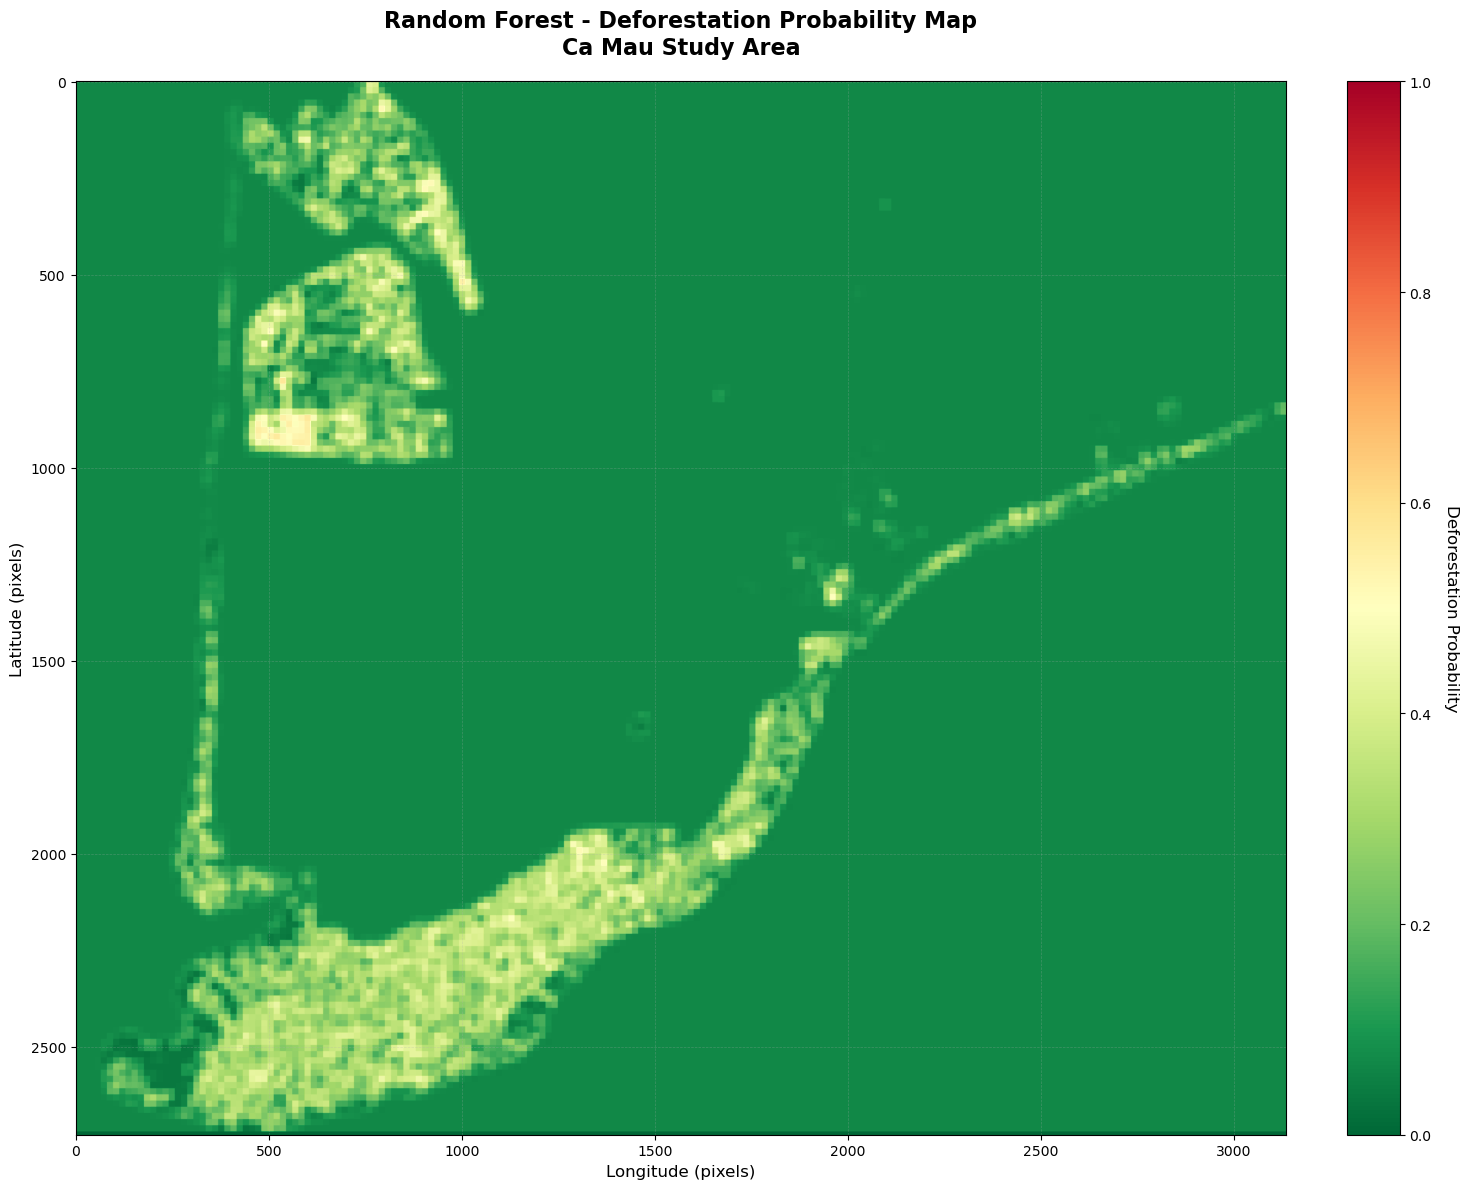

Figure saved to: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\figures\random_forest_full_probability_map.png


In [24]:
# Full probability map
# Downsample to reduce memory usage when plotting
from skimage.transform import resize

# Downsample to 1/4 resolution for visualization
downsample_factor = 4
h_small = h // downsample_factor
w_small = w // downsample_factor

print(f"Downsampling probability map from {h}x{w} to {h_small}x{w_small} for visualization...")
prob_map_small = resize(prob_map, (h_small, w_small), order=1, preserve_range=True, anti_aliasing=True)
print("Downsampling complete!")
print()

fig, ax = plt.subplots(figsize=(16, 12))

im = ax.imshow(prob_map_small, cmap='RdYlGn_r', vmin=0, vmax=1)
ax.set_title('Random Forest - Deforestation Probability Map\nCa Mau Study Area', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Longitude (pixels)', fontsize=12)
ax.set_ylabel('Latitude (pixels)', fontsize=12)

# Colorbar
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Deforestation Probability', fontsize=12, rotation=270, labelpad=20)

# Add grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig(figures_dir / 'random_forest_full_probability_map.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Figure saved to: {figures_dir / 'random_forest_full_probability_map.png'}")

## 16. Visualize Binary Classification Map

Downsampling binary map from 10917x12547 to 2729x3136 for visualization...
Downsampling complete!



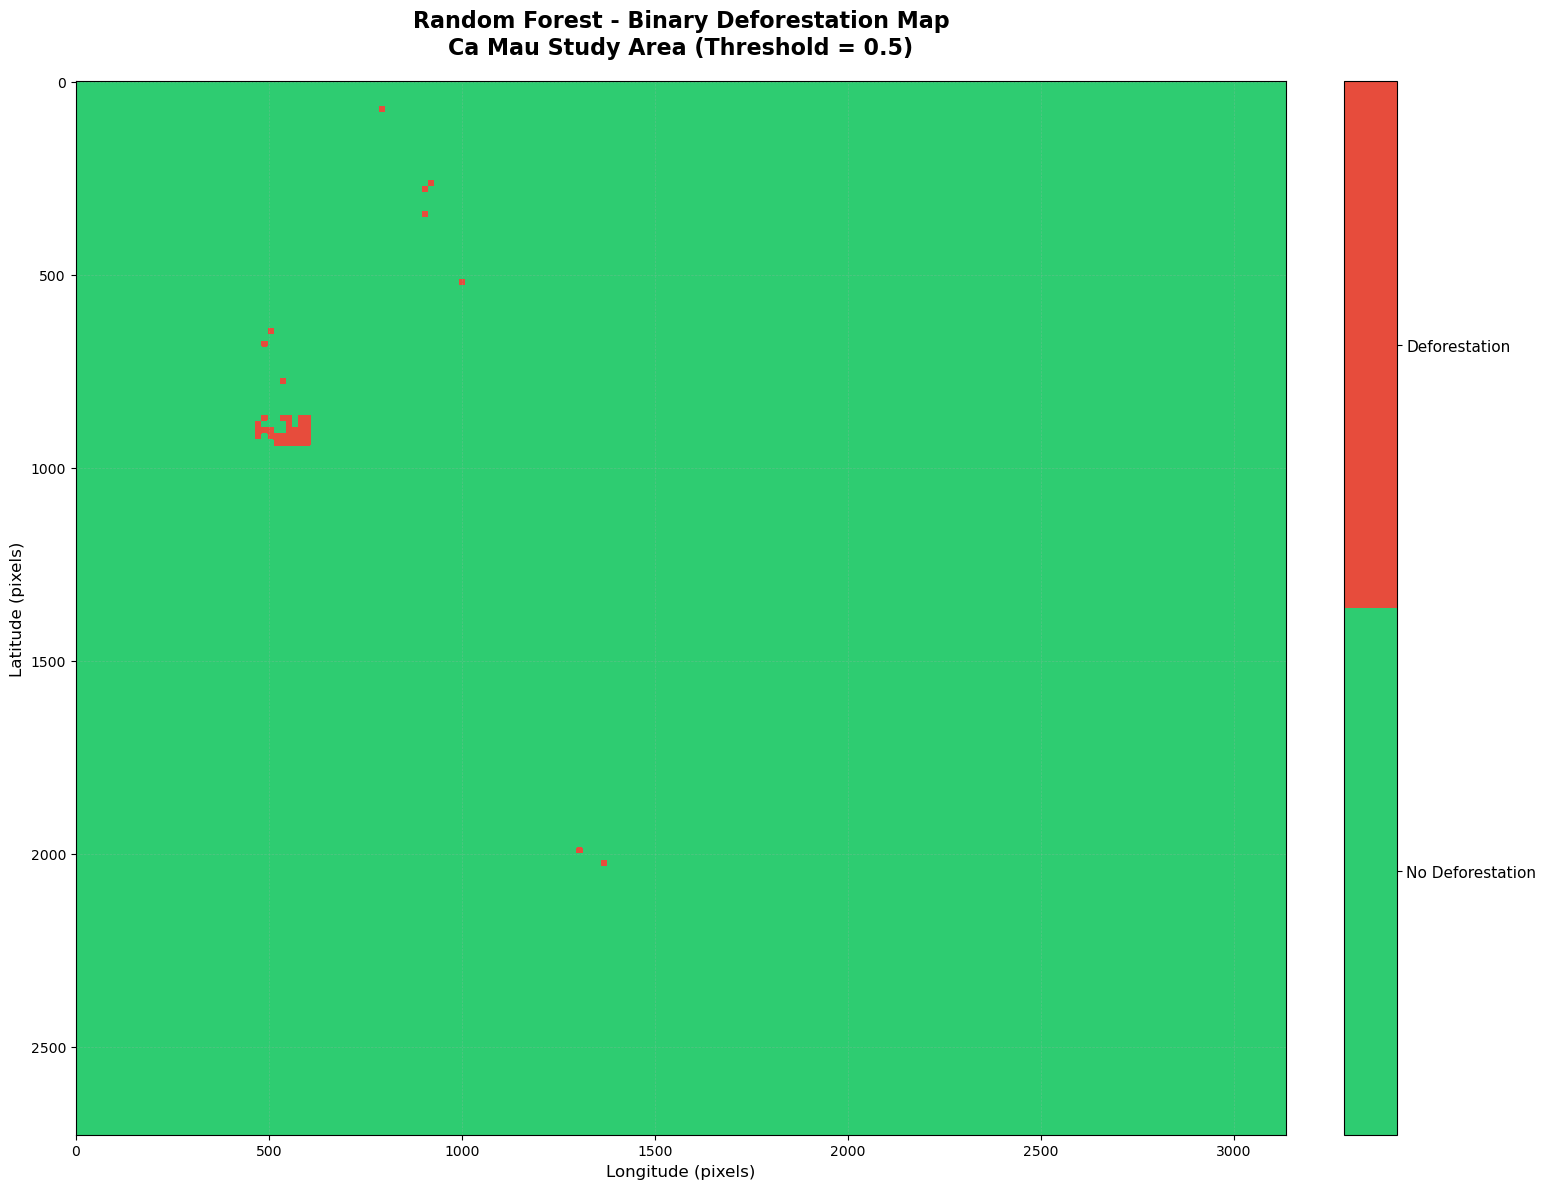

Figure saved to: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\figures\random_forest_full_binary_map.png


In [25]:
# Binary map with custom colors
# Downsample to reduce memory usage when plotting
from skimage.transform import resize

# Downsample to 1/4 resolution for visualization
downsample_factor = 4
h_small = h // downsample_factor
w_small = w // downsample_factor

print(f"Downsampling binary map from {h}x{w} to {h_small}x{w_small} for visualization...")
binary_map_small = resize(binary_map, (h_small, w_small), order=0, preserve_range=True, anti_aliasing=False).astype(np.uint8)
print("Downsampling complete!")
print()

fig, ax = plt.subplots(figsize=(16, 12))

# Custom colormap: green for no deforestation, red for deforestation
colors = ['#2ecc71', '#e74c3c']  # Green, Red
cmap = ListedColormap(colors)

im = ax.imshow(binary_map_small, cmap=cmap, vmin=0, vmax=1)
ax.set_title('Random Forest - Binary Deforestation Map\nCa Mau Study Area (Threshold = 0.5)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Longitude (pixels)', fontsize=12)
ax.set_ylabel('Latitude (pixels)', fontsize=12)

# Colorbar with custom labels
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, ticks=[0.25, 0.75])
cbar.ax.set_yticklabels(['No Deforestation', 'Deforestation'], fontsize=11)

# Add grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig(figures_dir / 'random_forest_full_binary_map.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Figure saved to: {figures_dir / 'random_forest_full_binary_map.png'}")

Downsampling images from 10917x12547 to 2729x3136 for visualization...
Downsampling complete!



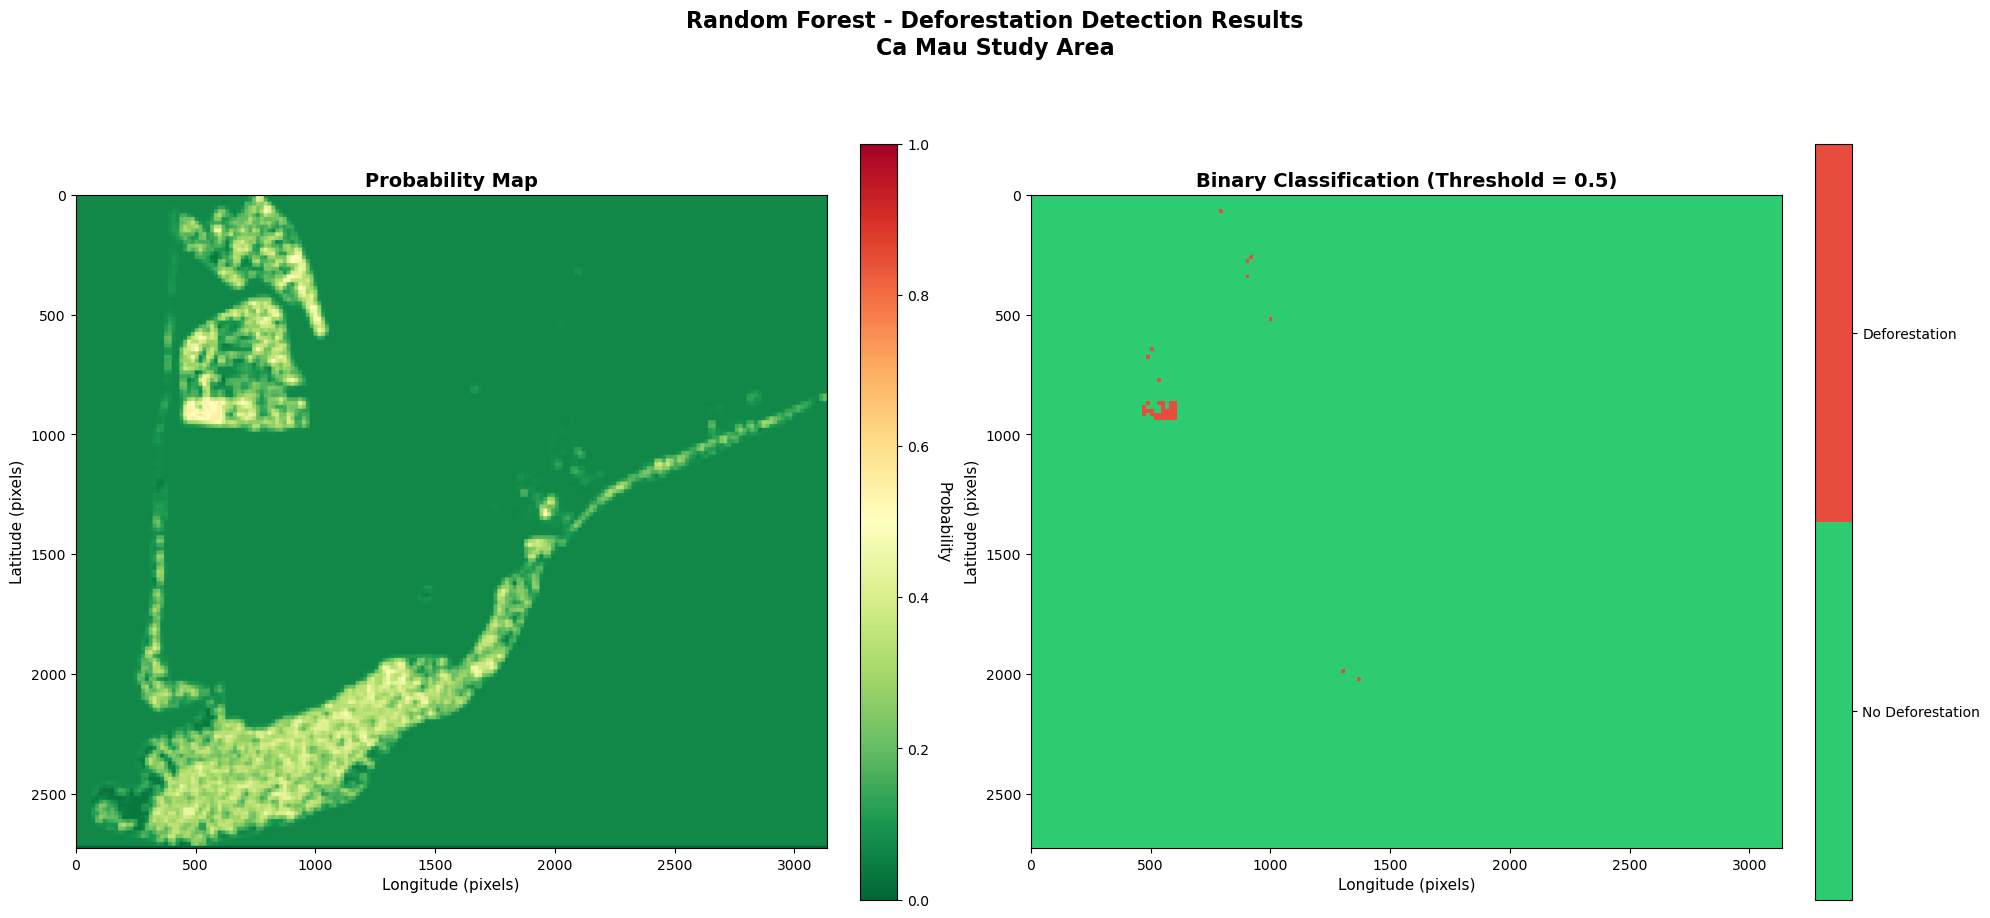

Figure saved to: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\figures\random_forest_comparison_maps.png


In [26]:
# Side-by-side comparison
# Downsample images to reduce memory usage when plotting
from skimage.transform import resize

# Downsample to 1/4 resolution for visualization (still ~2700x3100 pixels)
downsample_factor = 4
h_small = h // downsample_factor
w_small = w // downsample_factor

print(f"Downsampling images from {h}x{w} to {h_small}x{w_small} for visualization...")
prob_map_small = resize(prob_map, (h_small, w_small), order=1, preserve_range=True, anti_aliasing=True)
binary_map_small = resize(binary_map, (h_small, w_small), order=0, preserve_range=True, anti_aliasing=False).astype(np.uint8)
print("Downsampling complete!")
print()

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Probability map
im1 = axes[0].imshow(prob_map_small, cmap='RdYlGn_r', vmin=0, vmax=1)
axes[0].set_title('Probability Map', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Longitude (pixels)', fontsize=11)
axes[0].set_ylabel('Latitude (pixels)', fontsize=11)
cbar1 = plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)
cbar1.set_label('Probability', fontsize=11, rotation=270, labelpad=15)

# Binary map
colors = ['#2ecc71', '#e74c3c']
cmap = ListedColormap(colors)
im2 = axes[1].imshow(binary_map_small, cmap=cmap, vmin=0, vmax=1)
axes[1].set_title('Binary Classification (Threshold = 0.5)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Longitude (pixels)', fontsize=11)
axes[1].set_ylabel('Latitude (pixels)', fontsize=11)
cbar2 = plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04, ticks=[0.25, 0.75])
cbar2.ax.set_yticklabels(['No Deforestation', 'Deforestation'], fontsize=10)

# Overall title
fig.suptitle('Random Forest - Deforestation Detection Results\nCa Mau Study Area', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.savefig(figures_dir / 'random_forest_comparison_maps.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Figure saved to: {figures_dir / 'random_forest_comparison_maps.png'}")

Sampling data for histogram (using 1% of pixels to save memory)...
Sampled 1,370,460 pixels out of 136,975,599 total pixels



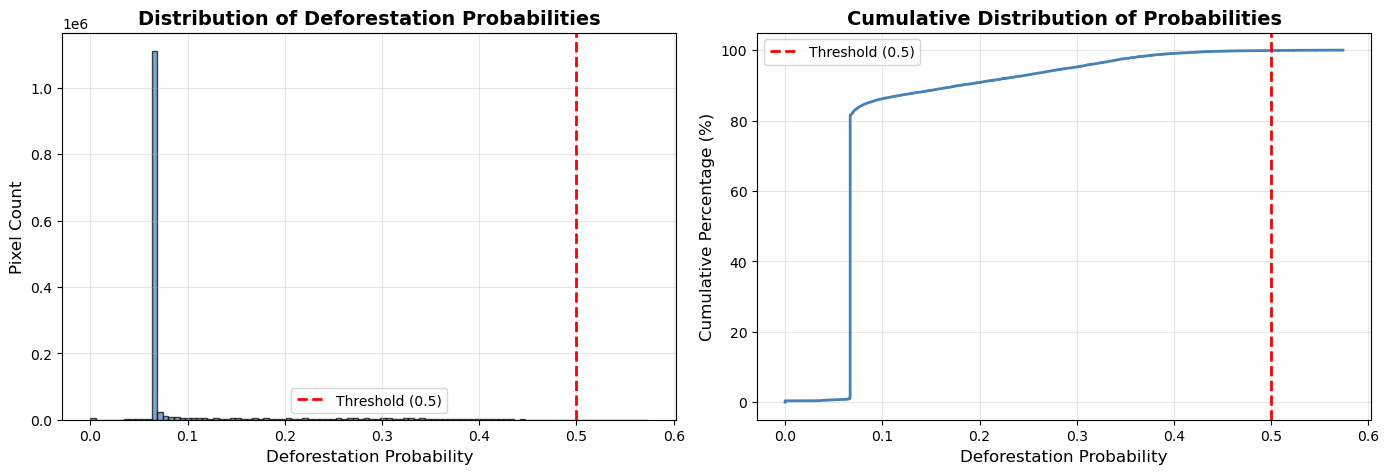

Figure saved to: d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\figures\random_forest_probability_distribution.png


In [27]:
# Histogram of probability values
# Sample data to reduce memory usage (use every 10th pixel)
print("Sampling data for histogram (using 1% of pixels to save memory)...")
sample_step = 10  # Use every 10th pixel in both dimensions = 1% of data
prob_map_sampled = prob_map[::sample_step, ::sample_step].flatten()
print(f"Sampled {len(prob_map_sampled):,} pixels out of {prob_map.size:,} total pixels")
print()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(prob_map_sampled, bins=100, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(0.5, color='red', linestyle='--', linewidth=2, label='Threshold (0.5)')
axes[0].set_xlabel('Deforestation Probability', fontsize=12)
axes[0].set_ylabel('Pixel Count', fontsize=12)
axes[0].set_title('Distribution of Deforestation Probabilities', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# Cumulative distribution
sorted_probs = np.sort(prob_map_sampled)
cumulative = np.arange(1, len(sorted_probs) + 1) / len(sorted_probs) * 100
axes[1].plot(sorted_probs, cumulative, color='steelblue', linewidth=2)
axes[1].axvline(0.5, color='red', linestyle='--', linewidth=2, label='Threshold (0.5)')
axes[1].set_xlabel('Deforestation Probability', fontsize=12)
axes[1].set_ylabel('Cumulative Percentage (%)', fontsize=12)
axes[1].set_title('Cumulative Distribution of Probabilities', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(figures_dir / 'random_forest_probability_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Figure saved to: {figures_dir / 'random_forest_probability_distribution.png'}")

## 17. Final Summary

In [28]:
print()
print("="*80)
print("RANDOM FOREST - COMPLETE ANALYSIS SUMMARY")
print("="*80)
print()
print("MODEL PERFORMANCE:")
print("-"*80)
print(f"  Test Accuracy:  {test_metrics['accuracy']:.2%}")
print(f"  Test F1 Score:  {test_metrics['f1']:.2%}")
print(f"  Test AUC:       {test_metrics['auc']:.2%}")
print()
print("DEFORESTATION DETECTION:")
print("-"*80)
print(f"  Total area:         {total_area_km2:.2f} km²")
print(f"  Deforestation area: {deforestation_area_km2:.2f} km²")
print(f"  Deforestation:      {deforestation_percentage:.2f}%")
print()
print("TIMING:")
print("-"*80)
print(f"  Training time:  {training_time/60:.2f} minutes")
print(f"  Inference time: {inference_time/60:.2f} minutes")
print(f"  Total time:     {(training_time + inference_time)/60:.2f} minutes")
print()
print("OUTPUT FILES:")
print("-"*80)
print("Model:")
print(f"  - {model_path}")
print()
print("Maps:")
print(f"  - {prob_output_path}")
print(f"  - {binary_output_path}")
print()
print("Figures:")
print(f"  - {figures_dir / 'random_forest_confusion_matrix.png'}")
print(f"  - {figures_dir / 'random_forest_roc_curve.png'}")
print(f"  - {figures_dir / 'random_forest_band_importance.png'}")
print(f"  - {figures_dir / 'random_forest_spatial_importance.png'}")
print(f"  - {figures_dir / 'random_forest_full_probability_map.png'}")
print(f"  - {figures_dir / 'random_forest_full_binary_map.png'}")
print(f"  - {figures_dir / 'random_forest_comparison_maps.png'}")
print(f"  - {figures_dir / 'random_forest_probability_distribution.png'}")
print()
print("KEY INSIGHTS:")
print("-"*80)
print(f"  - Most important band: {band_names[band_importance.argmax()]}")
print(f"  - Random Forest detected {deforestation_percentage:.2f}% deforestation")
print(f"  - Inference was {inference_time/60:.1f}x slower than CNN (~2 min)")
print(f"  - Model provides interpretable feature importance")
print()
print("="*80)
print("ALL ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*80)


RANDOM FOREST - COMPLETE ANALYSIS SUMMARY

MODEL PERFORMANCE:
--------------------------------------------------------------------------------
  Test Accuracy:  99.48%
  Test F1 Score:  99.47%
  Test AUC:       99.99%

DEFORESTATION DETECTION:
--------------------------------------------------------------------------------
  Total area:         13697.56 km²
  Deforestation area: 16.38 km²
  Deforestation:      0.12%

TIMING:
--------------------------------------------------------------------------------
  Training time:  0.08 minutes
  Inference time: 0.95 minutes
  Total time:     1.03 minutes

OUTPUT FILES:
--------------------------------------------------------------------------------
Model:
  - d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\checkpoints\random_forest_best.pkl

Maps:
  - d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\outputs\random_forest_probability_map.tif
  - d:\HaiDang\25-26_HKI_DATN_21021411_DangNH\outputs\random_forest_binary_map.tif

Figures:
  - d:\HaiDang\25-26_HKI